<h3>Importar Libreria<h3>

In [293]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<h3>Cargar Banco de Datos<h3>

In [398]:
df = pd.read_csv('./data/diabetes_data.csv', sep=';')

In [399]:
df.head(3)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [401]:
#Traducir los nombres de las columnas
def cambiar_nombres_columnas(df):
    nombres = {
        'age': 'edad',
        'gender': 'genero',
        'polyuria': 'poliuria',
        'polydipsia': 'polidipsia',
        'sudden_weight_loss': 'perdida_subita_de_peso',
        'weakness': 'debilidad',
        'polyphagia': 'polifagia',
        'genital_thrush': 'candidiasis_genital',
        'visual_blurring': 'vision_borrosa',
        'itching': 'picazon',
        'irritability': 'irritabilidad',
        'delayed_healing': 'curacion_lenta',
        'partial_paresis': 'paresia_parcial',
        'muscle_stiffness': 'rigidez_muscular',
        'alopecia': 'alopecia',
        'obesity': 'obesidad',
        'class': 'clase'
    }
    df = df.rename(columns=nombres)
    return df


In [402]:
df = cambiar_nombres_columnas(df)

In [403]:
#Nuevos Nombres de Columnas

df.columns

Index(['edad', 'genero', 'poliuria', 'polidipsia', 'perdida_subita_de_peso',
       'debilidad', 'polifagia', 'candidiasis_genital', 'vision_borrosa',
       'picazon', 'irritabilidad', 'curacion_lenta', 'paresia_parcial',
       'rigidez_muscular', 'alopecia', 'obesidad', 'clase'],
      dtype='object')

Text(0.5, 0, 'Edad')

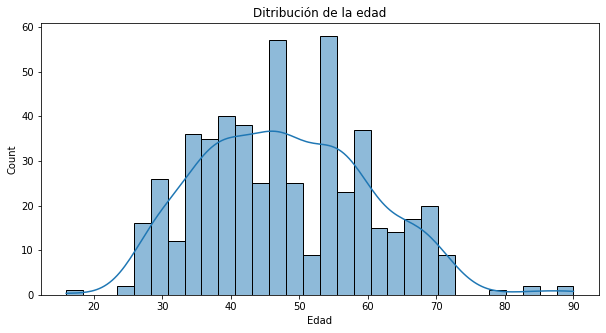

In [407]:
#Distribución de la edad 
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='edad' , bins=30 , kde=True)
plt.title('Ditribución de la edad')
plt.xlabel('Edad')

In [366]:
#Escalado o Normalización de los datos
# from sklearn.preprocessing import MinMaxScaler
# from joblib import dump

# def escalar_edad(df):
#     scaler = MinMaxScaler()
#     edad_scaled = scaler.fit_transform(df[['edad']])
#     df['edad'] = edad_scaled
#     dump(scaler, './model/scaler.joblib')
#     return df

In [367]:
#df = escalar_edad(df)

In [409]:
#Reombrar Género
def renombrar_genero(df):
    # Definir diccionario para la traducción de los valores
    genero_dict = {'Male': 'Hombre', 'Female': 'Mujer'}

    # Aplicar la traducción en la variable 'genero'
    df['genero'] = df['genero'].apply(lambda x: genero_dict[x])

    return df

df = renombrar_genero(df)

In [413]:
df.head()

,edad,genero,poliuria,polidipsia,perdida_subita_de_peso,debilidad,polifagia,candidiasis_genital,vision_borrosa,picazon,irritabilidad,curacion_lenta,paresia_parcial,rigidez_muscular,alopecia,obesidad,clase
0,40,Hombre,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Hombre,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Hombre,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Hombre,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Hombre,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [370]:
#Test de scaler
#from joblib import load
#scaler = load('./model/scaler.joblib')
#scaler.transform([[35]])

array([[0.25675676]])

Text(0.5, 0, 'Edad')

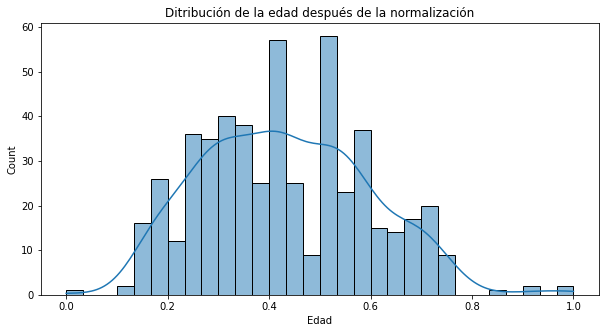

In [371]:
#Distribución de la edad después de la normalización
#plt.figure(figsize=(10,5))
#sns.histplot(data=df, x='edad' , bins=30 , kde=True)
#plt.title('Ditribución de la edad después de la normalización')
#plt.xlabel('Edad')

In [488]:
# Separar los datos en X e y
X = df.drop(columns=['clase'],axis=1)
y = df['clase']

In [490]:
#Pipeline de Pre Procesamiento
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.compose import ColumnTransformer

def pipe_line_preprocesamiento(X):
    # Create Column Transformer with 3 types of transformers
    numerical_columns = X.select_dtypes(exclude="object").columns
    categorical_columns = X.select_dtypes(include="object").columns
    
    print(numerical_columns)
    print(categorical_columns)
    
    numeric_transformer = StandardScaler()
    oh_transformer = OneHotEncoder()

    preprocessor = ColumnTransformer(
        [
            ("OneHotEncoder", oh_transformer, categorical_columns),
            ("StandardScaler", numeric_transformer, numerical_columns),        
        ]
    )
    
    
    # num_pipeline = Pipeline(
    # steps=[
    #     ("imputer", SimpleImputer(strategy="median")),
    #     ("scaler", StandardScaler())
    #     ]
    # )
    
    # cat_pipeline = Pipeline(
    #     steps=[
    #         ("imputer", SimpleImputer(strategy="most_frequent")),
    #         ("one_hot_encoder", OneHotEncoder()),
    #         ("scaler", StandardScaler(with_mean=False))
    #     ]
    # )    

    # preprocessor = ColumnTransformer(
    #     [
    #         ("num_pipeline", num_pipeline, numerical_columns),
    #         ("cat_pipelines", cat_pipeline, categorical_columns)

    #     ]


    # )

    X = preprocessor.fit_transform(X)
    #Almacena el preprocesador
    dump(preprocessor, './model/preprocessor.joblib')
    
    return X

# def one_hot_encoder(df):
#     encoder = OneHotEncoder(handle_unknown='ignore')
#     genero_encoded = encoder.fit_transform(df[['genero']])
#     genero_encoded_df = pd.DataFrame(genero_encoded.toarray(), columns=encoder.get_feature_names(['genero']))
#     df = pd.concat([df, genero_encoded_df], axis=1)
#     df = df.drop(['genero'], axis=1)
#     return df

In [491]:
X = pipe_line_preprocesamiento(X)

Index(['edad', 'poliuria', 'polidipsia', 'perdida_subita_de_peso', 'debilidad',
       'polifagia', 'candidiasis_genital', 'vision_borrosa', 'picazon',
       'irritabilidad', 'curacion_lenta', 'paresia_parcial',
       'rigidez_muscular', 'alopecia', 'obesidad'],
      dtype='object')
Index(['genero'], dtype='object')


In [492]:
X

array([[ 1.        ,  0.        , -0.6613669 , ...,  1.29099445,
         1.38022749,  2.21564684],
       [ 1.        ,  0.        ,  0.82136224, ..., -0.77459667,
         1.38022749, -0.45133547],
       [ 1.        ,  0.        , -0.57899306, ...,  1.29099445,
         1.38022749, -0.45133547],
       ...,
       [ 0.        ,  1.        ,  0.82136224, ...,  1.29099445,
        -0.72451824,  2.21564684],
       [ 0.        ,  1.        , -1.32035762, ..., -0.77459667,
         1.38022749, -0.45133547],
       [ 1.        ,  0.        , -0.49661921, ..., -0.77459667,
        -0.72451824, -0.45133547]])

In [493]:
X
print(X.shape)

(520, 17)


In [494]:
df.head()

,edad,genero,poliuria,polidipsia,perdida_subita_de_peso,debilidad,polifagia,candidiasis_genital,vision_borrosa,picazon,irritabilidad,curacion_lenta,paresia_parcial,rigidez_muscular,alopecia,obesidad,clase
0,40,Hombre,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Hombre,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Hombre,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Hombre,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Hombre,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [495]:
df.head(1).to_json(orient='records')

'[{"edad":40,"genero":"Hombre","poliuria":0,"polidipsia":1,"perdida_subita_de_peso":0,"debilidad":1,"polifagia":0,"candidiasis_genital":0,"vision_borrosa":0,"picazon":1,"irritabilidad":0,"curacion_lenta":1,"paresia_parcial":0,"rigidez_muscular":1,"alopecia":1,"obesidad":1,"clase":1}]'

In [496]:
#Analisis Exploratorio de Datos
import seaborn as sns
import matplotlib.pyplot as plt

def exploratorio_datos(df, target_col):
    # resumen estadístico
    print(df.describe())
    
    # gráfico de correlación
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Gráfico de correlación')
    plt.show()
    
    # distribución de la variable objetivo
    sns.countplot(x=target_col, data=df)
    plt.title('Distribución de la variable objetivo')
    plt.show()
    
    # gráficos de distribución de las variables numéricas
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        sns.displot(df, x=col)
        plt.title(f'Distribución de {col}')
        plt.show()
    
    # gráficos de caja de las variables numéricas por variable objetivo
    for col in num_cols:
        sns.boxplot(x=target_col, y=col, data=df)
        plt.title(f'Boxplot de {col} por {target_col}')
        plt.show()
    
    # gráfico de barras de las variables categóricas por variable objetivo
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        sns.countplot(x=col, hue=target_col, data=df)
        plt.title(f'Gráfico de barras de {col} por {target_col}')
        plt.show()

             edad    poliuria  polidipsia  perdida_subita_de_peso   debilidad  \
count  520.000000  520.000000  520.000000              520.000000  520.000000   
mean    48.028846    0.496154    0.448077                0.417308    0.586538   
std     12.151466    0.500467    0.497776                0.493589    0.492928   
min     16.000000    0.000000    0.000000                0.000000    0.000000   
25%     39.000000    0.000000    0.000000                0.000000    0.000000   
50%     47.500000    0.000000    0.000000                0.000000    1.000000   
75%     57.000000    1.000000    1.000000                1.000000    1.000000   
max     90.000000    1.000000    1.000000                1.000000    1.000000   

        polifagia  candidiasis_genital  vision_borrosa     picazon  \
count  520.000000           520.000000      520.000000  520.000000   
mean     0.455769             0.223077        0.448077    0.486538   
std      0.498519             0.416710        0.497776    0.

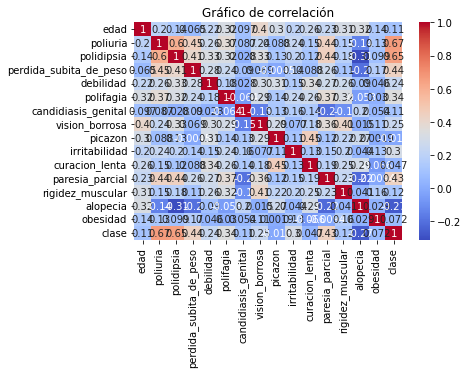

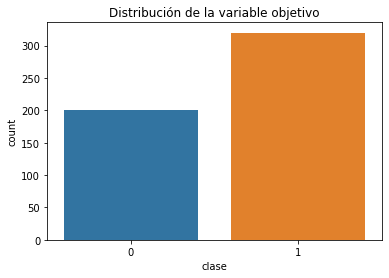

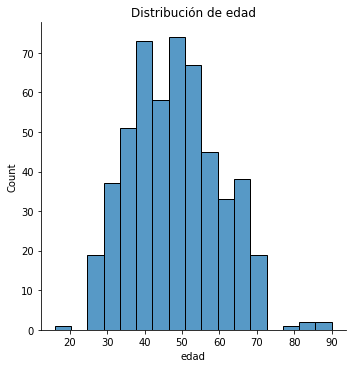

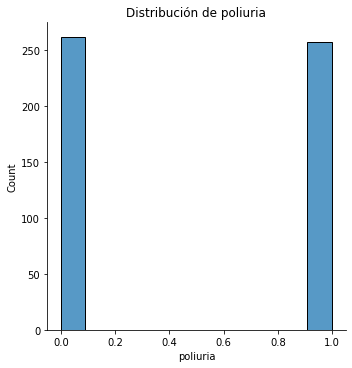

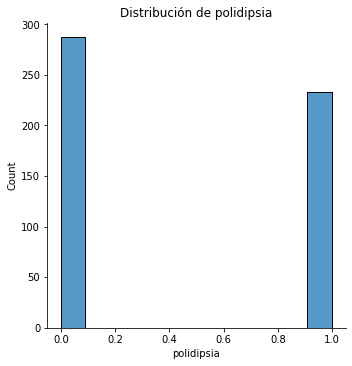

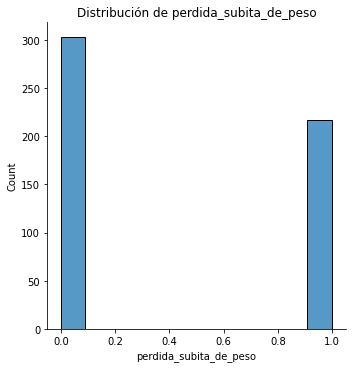

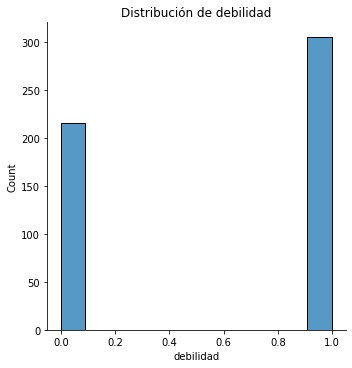

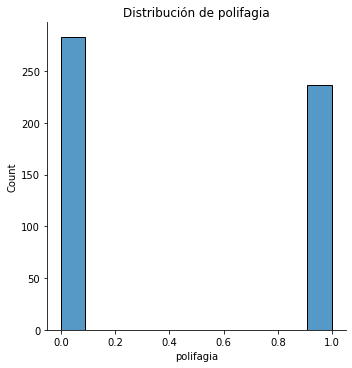

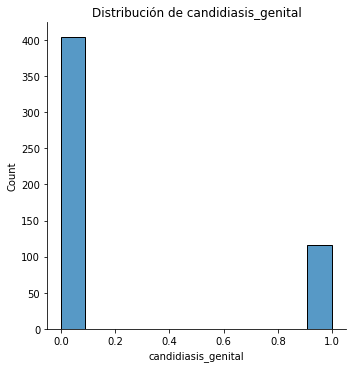

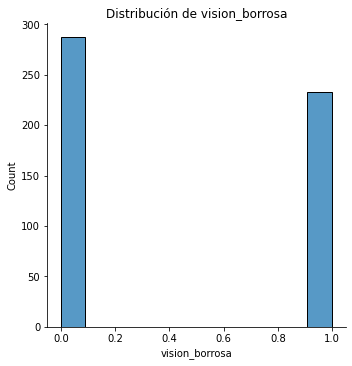

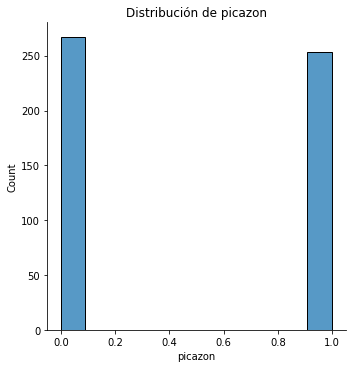

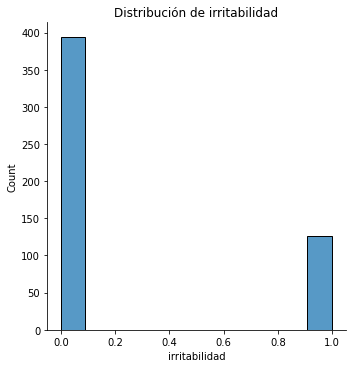

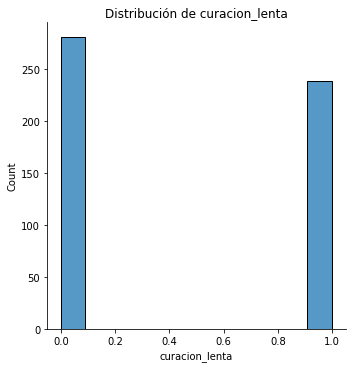

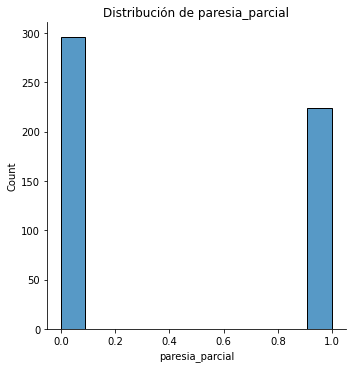

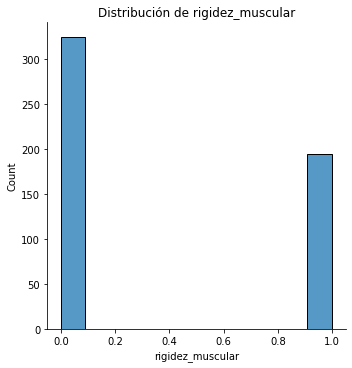

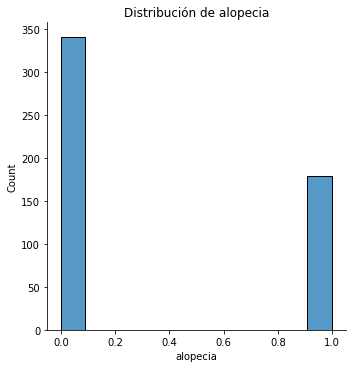

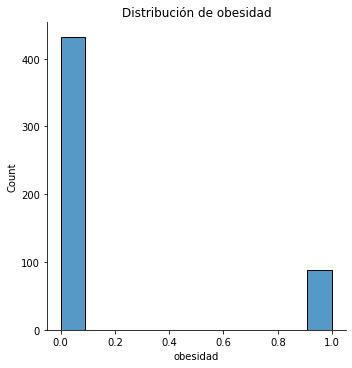

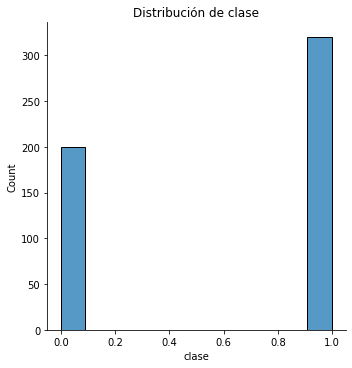

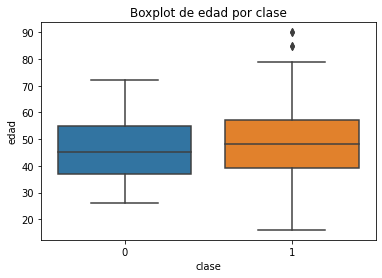

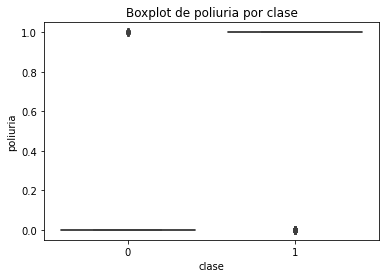

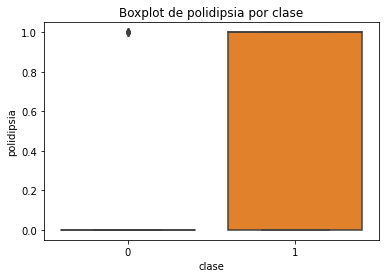

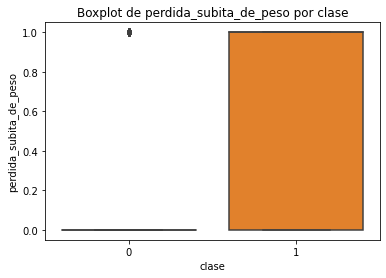

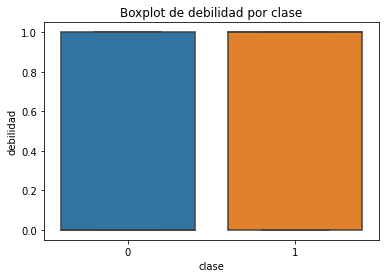

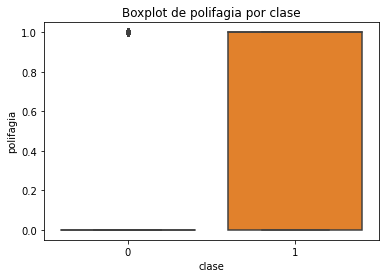

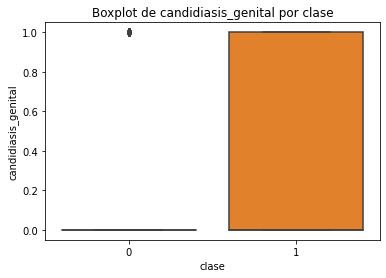

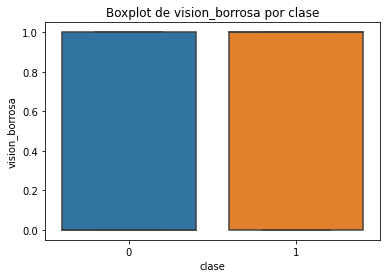

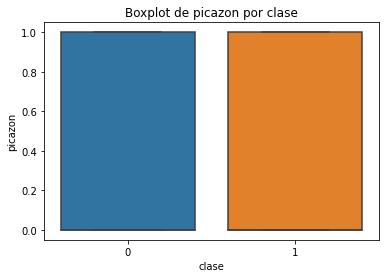

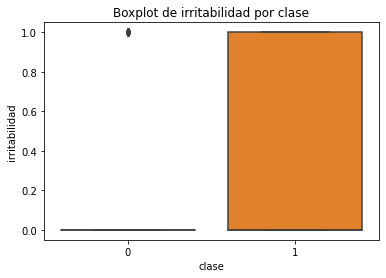

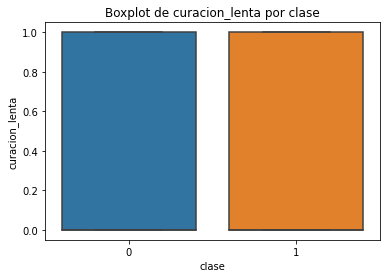

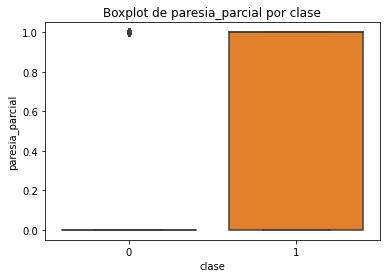

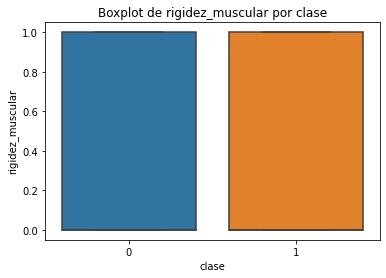

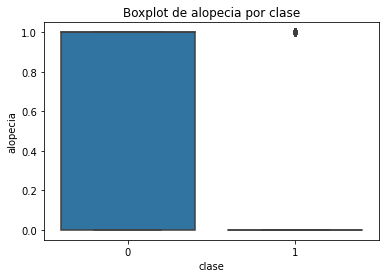

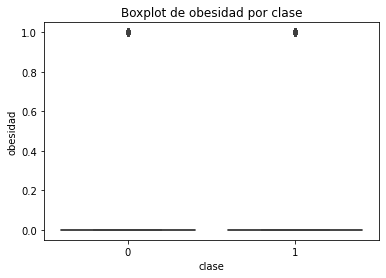

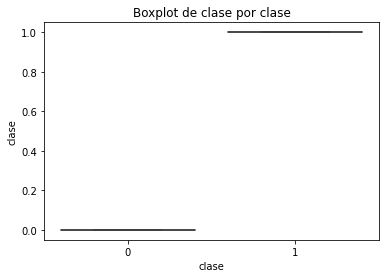

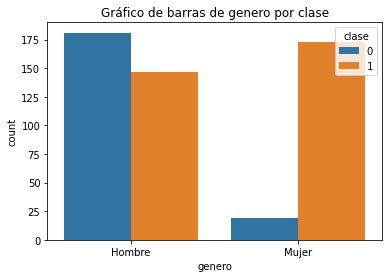

In [497]:
exploratorio_datos(df, 'clase')

In [498]:
#Separación de los conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

def separar_train_test(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test


In [499]:
X_train, X_test, y_train, y_test = separar_train_test(X, y)

In [540]:
#Función de Entrrenamiento y Evaluación de Modelos
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
#Optimización de hiperparámetros
from sklearn.model_selection import GridSearchCV

def entrenar_evaluar_modelos(X_train, X_test, y_train, y_test):
    """
    Función que entrena y evalúa distintos modelos de clasificación, incluyendo al menos 12 modelos,
    utilizando los datos de entrenamiento y prueba proporcionados. Se muestra el tiempo de entrenamiento,
    las métricas de clasificación y una gráfica de la matriz de confusión para cada modelo. Además, se incluye
    la validación cruzada.

    Args:
        X_train (pandas.DataFrame): Datos de entrenamiento.
        X_test (pandas.DataFrame): Datos de prueba.
        y_train (pandas.Series): Etiquetas de entrenamiento.
        y_test (pandas.Series): Etiquetas de prueba.
    """
    
    #Modelos
    models = [
        ('Regresión Logística', LogisticRegression(), {'C': [0.1, 1, 10]}),
        ('K-Vecinos más Cercanos', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
        ('Árbol de decisión', DecisionTreeClassifier(), {'max_depth': [3, 5, 7]}),
        ('Random Forest', RandomForestClassifier(), {'n_estimators': [50, 100, 150]}),
        ('Support Vector Machines', SVC(), {'C': [0.1, 1, 10]}),
        ('Red Neuronal Artificial', MLPClassifier(), {'hidden_layer_sizes': [(10,), (20,), (30,)]}),
        ('Perceptrón Multicapa', MLPClassifier(), {'hidden_layer_sizes': [(10, 10,), (20, 20,), (30, 30,)]}),
        ('Gradient Boosting', GradientBoostingClassifier(), {'n_estimators': [50, 100, 150]}),
        ('XGBoost', XGBClassifier(), {'n_estimators': [50, 100, 150]}),
        ('CatBoost', CatBoostClassifier(verbose=False), {'n_estimators': [50, 100, 150]})
        ]
    
    #Se crea diccionario para guardar resultados
    resultados = {}

    for name, model, params in models:
        inicio = time.time()
        model = GridSearchCV(model, params, cv=5, scoring='f1')
        model.fit(X_train, y_train)
        tiempo_entrenamiento = time.time() - inicio
        print(f"Tiempo de entrenamiento: {tiempo_entrenamiento:.2f} segundos")
        # Predicciones
        y_pred = model.predict(X_test)

        # Métricas de clasificación
        print(f"Modelo: {name}\n{'-'*50}")
        print("Métricas de clasificación:")
        print(classification_report(y_test, y_pred))
        
        
        #Guardar resultados
        reporte_clasificacion = classification_report(y_test, y_pred)
        matriz_confusion = confusion_matrix(y_test, y_pred)
        cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        #Para las variables precision, recall y f1 se utiliza el parámetro pos_label=1 para que se calcule para la clase 1
        precision = precision_score(y_test, y_pred, pos_label=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        resultados[name] = {'modelo': model, 'matriz_confusion': matriz_confusion, 
                          'cross_val_scores': cross_val_scores, 'precision': precision, 'recall': recall, 'f1': f1, 
                          'tiempo_entrenamiento': tiempo_entrenamiento}

        # Matriz de confusión
        conf_matrix = confusion_matrix(y_test, y_pred)
        fig, ax = plt.subplots()
        plt.imshow(conf_matrix, cmap=plt.cm.Blues)
        plt.colorbar()
        ax.set_xticks(np.arange(len(np.unique(y_test))))
        ax.set_yticks(np.arange(len(np.unique(y_test))))
        ax.set_xticklabels(np.unique(y_test))
        ax.set_yticklabels(np.unique(y_test))
        plt.xlabel('Predicciones')
        plt.ylabel('Valores verdaderos')
        plt.title(f"Matriz de confusión - {name}")
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
        plt.show()

        # Validación cruzada
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
        print("Validación cruzada:")
        print(f"Puntajes: {scores}")
        print(f"Media: {scores.mean():.3f}")
        print(f"Desviación estándar: {scores.std():.3f}")
        print(f"Tiempo de entrenamiento: {tiempo_entrenamiento:.3f}s\n")
        
    return resultados

Tiempo de entrenamiento: 0.18 segundos
Modelo: Regresión Logística
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



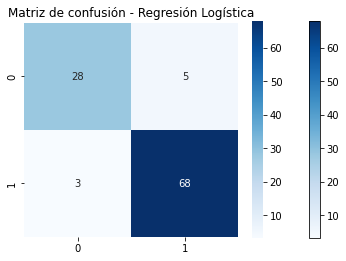

Validación cruzada:
Puntajes: [0.92473118 0.90721649 0.92929293 0.92929293 0.92929293]
Media: 0.924
Desviación estándar: 0.009
Tiempo de entrenamiento: 0.178s

Tiempo de entrenamiento: 0.07 segundos
Modelo: K-Vecinos más Cercanos
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        33
           1       0.97      0.86      0.91        71

    accuracy                           0.88       104
   macro avg       0.86      0.90      0.87       104
weighted avg       0.90      0.88      0.89       104



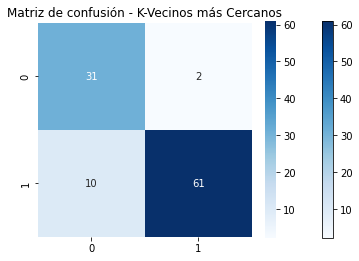

Validación cruzada:
Puntajes: [0.95833333 0.98       0.93617021 0.96       0.95833333]
Media: 0.959
Desviación estándar: 0.014
Tiempo de entrenamiento: 0.071s

Tiempo de entrenamiento: 0.03 segundos
Modelo: Árbol de decisión
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.99      0.93      0.96        71

    accuracy                           0.94       104
   macro avg       0.92      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



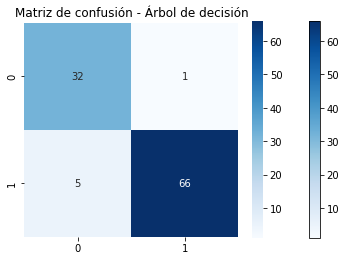

Validación cruzada:
Puntajes: [0.95918367 0.95918367 0.99009901 0.94117647 0.96078431]
Media: 0.962
Desviación estándar: 0.016
Tiempo de entrenamiento: 0.033s

Tiempo de entrenamiento: 1.92 segundos
Modelo: Random Forest
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



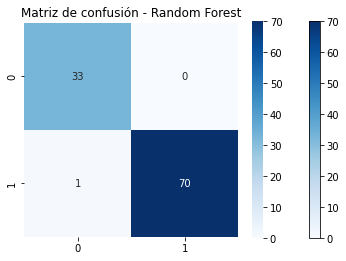

Validación cruzada:
Puntajes: [0.96907216 0.98       0.96       0.96       0.98989899]
Media: 0.972
Desviación estándar: 0.012
Tiempo de entrenamiento: 1.916s

Tiempo de entrenamiento: 0.09 segundos
Modelo: Support Vector Machines
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.99      0.99      0.99        71

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



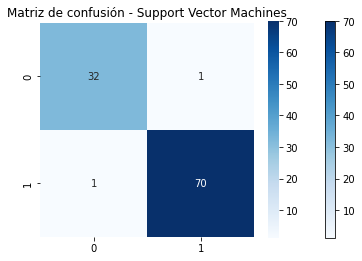

Validación cruzada:
Puntajes: [0.94736842 0.97029703 0.94845361 0.97029703 0.98      ]
Media: 0.963
Desviación estándar: 0.013
Tiempo de entrenamiento: 0.087s

Tiempo de entrenamiento: 2.62 segundos
Modelo: Red Neuronal Artificial
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.94      0.94      0.94        71

    accuracy                           0.92       104
   macro avg       0.91      0.91      0.91       104
weighted avg       0.92      0.92      0.92       104



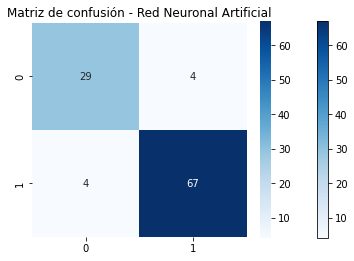

Validación cruzada:
Puntajes: [0.97959184 0.9375     0.9375     0.90909091 0.96      ]
Media: 0.945
Desviación estándar: 0.024
Tiempo de entrenamiento: 2.618s

Tiempo de entrenamiento: 4.34 segundos
Modelo: Perceptrón Multicapa
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.97      0.94      0.96        71

    accuracy                           0.94       104
   macro avg       0.93      0.94      0.93       104
weighted avg       0.94      0.94      0.94       104



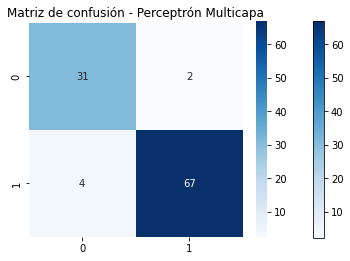

Validación cruzada:
Puntajes: [0.93617021 0.94949495 0.96969697 0.93877551 0.98      ]
Media: 0.955
Desviación estándar: 0.017
Tiempo de entrenamiento: 4.345s

Tiempo de entrenamiento: 1.43 segundos
Modelo: Gradient Boosting
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



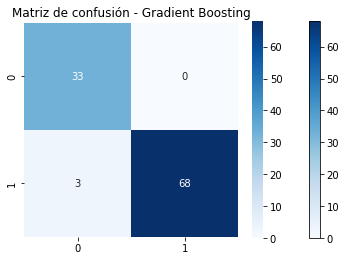

Validación cruzada:
Puntajes: [0.96907216 0.98       0.96       0.96       0.97959184]
Media: 0.970
Desviación estándar: 0.009
Tiempo de entrenamiento: 1.433s

Tiempo de entrenamiento: 0.69 segundos
Modelo: XGBoost
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



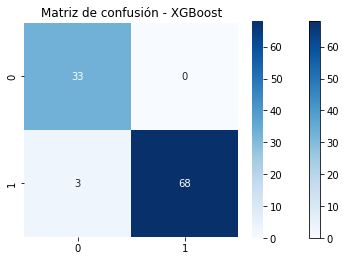

Validación cruzada:
Puntajes: [0.95833333 0.96969697 0.96       0.97029703 0.98969072]
Media: 0.970
Desviación estándar: 0.011
Tiempo de entrenamiento: 0.687s

Tiempo de entrenamiento: 2.28 segundos
Modelo: CatBoost
--------------------------------------------------
Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.99      0.99      0.99        71

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



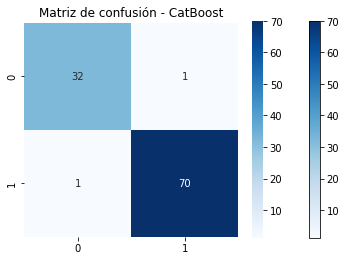

Validación cruzada:
Puntajes: [0.95833333 0.94949495 0.94845361 0.90721649 0.97029703]
Media: 0.947
Desviación estándar: 0.021
Tiempo de entrenamiento: 2.279s



In [541]:
resultados = entrenar_evaluar_modelos(X_train, X_test, y_train, y_test)

In [547]:
len(resultados)

10

In [576]:
def seleccionar_mejor_modelo(resultados, X=X_train):
    precision_dict = {}
    tiempo_entrenamiento_dict = {}
    for name, result in resultados.items():
        #Seleccion del mejor modelo basado en la validacion cruzada de la variable f1 y el tiempo de entrenamiento
        precision_dict[name] = result['cross_val_scores'].mean()
        tiempo_entrenamiento_dict[name] = result['tiempo_entrenamiento']
    
    # Seleccionar el modelo con la mayor precisión y menor tiempo de entrenamiento
    mejor_precision = max(precision_dict.values())
    candidatos = [name for name, precision in precision_dict.items() if precision == mejor_precision]
    mejor_tiempo_entrenamiento = min([tiempo_entrenamiento_dict[name] for name in candidatos])
    mejor_modelo = [name for name in candidatos if tiempo_entrenamiento_dict[name] == mejor_tiempo_entrenamiento][0]
    
    print('Mejor modelo:', mejor_modelo)
    print('Validación cruzada:', resultados[mejor_modelo]['cross_val_scores'])
    print('Precisión en la clase 1:', resultados[mejor_modelo]['precision'])
    print('Tiempo de entrenamiento:', resultados[mejor_modelo]['tiempo_entrenamiento'])

    # Gráfica de Media F1 en Validaci[on cruzada de cada modelo
    plt.figure(figsize=(25,5))
    plt.title('f1 en Validaciòn Cruzada de los modelos')
    plt.ylabel('f1')
    plt.xlabel('Modelo')
    sns.barplot(x=list(precision_dict.keys()), y=list(precision_dict.values()))
    plt.show()
    
    # Gráfica de Tiempo de entrenamiento de cada modelo
    
    plt.figure(figsize=(25,5))
    plt.title('Tiempo de entrenamiento de los modelos')
    plt.ylabel('Tiempo de entrenamiento')
    plt.xlabel('Modelo')
    plt.xticks(rotation=90)
    plt.bar(list(tiempo_entrenamiento_dict.keys()), list(tiempo_entrenamiento_dict.values()))
    plt.show()
    

    # Matriz de confusión del mejor modelo
    matriz_confusion = resultados[mejor_modelo]['matriz_confusion']
    plt.figure(figsize=(6,6))
    plt.title('Matriz de confusión del mejor modelo')
    sns.heatmap(matriz_confusion, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

    # Gráfica de las variables más importantes del mejor modelo
    from joblib import load
    preprocessor = load('./model/preprocessor.joblib')
    modelo = resultados[mejor_modelo]['modelo'].best_estimator_
    importances = modelo.feature_importances_
    indices = np.argsort(importances)[::-1]
    nombres_variables = []
    ohe_feature_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names(['genero'])
    scaled_columns = ['edad', 'poliuria', 'polidipsia', 'perdida_subita_de_peso', 'debilidad',
        'polifagia', 'candidiasis_genital', 'vision_borrosa', 'picazon',
        'irritabilidad', 'curacion_lenta', 'paresia_parcial',
        'rigidez_muscular', 'alopecia', 'obesidad']
    nombres_variables.extend(ohe_feature_names)
    nombres_variables.extend(scaled_columns)
    nombres_variables_importantes = [nombres_variables[i] for i in indices]
    plt.figure(figsize=(15,5))
    plt.title('Variables más importantes del mejor modelo')
    plt.ylabel('Importancia')
    plt.xlabel('Variables')
    plt.xticks(rotation=90)
    sns.barplot(x=nombres_variables_importantes[:10], y=importances[indices][:10])
    plt.show()
    
    #De los resultados se retorna el mejor modelo
    return mejor_modelo

Mejor modelo: Árbol de decisión
Validación cruzada: [0.94047619 0.97590361 1.         0.93975904 1.        ]
Precisión en la clase 1: 0.9850746268656716
Tiempo de entrenamiento: 0.03345775604248047


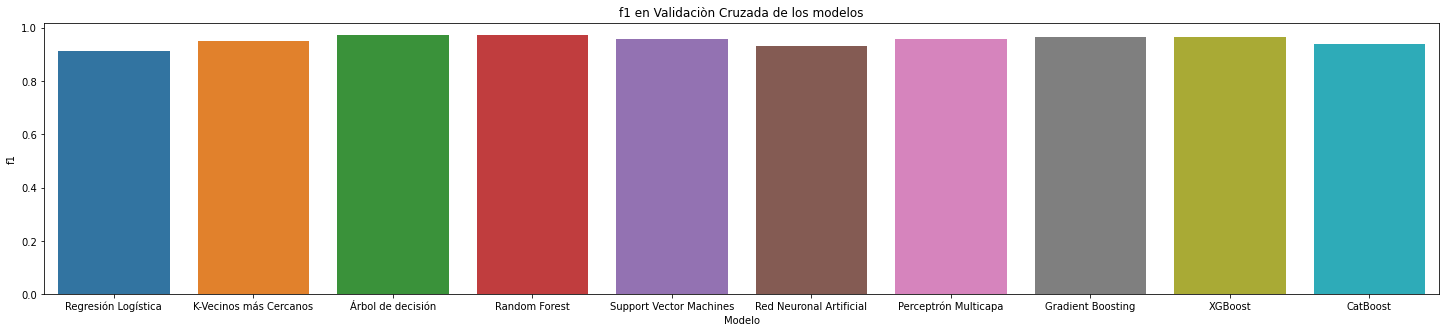

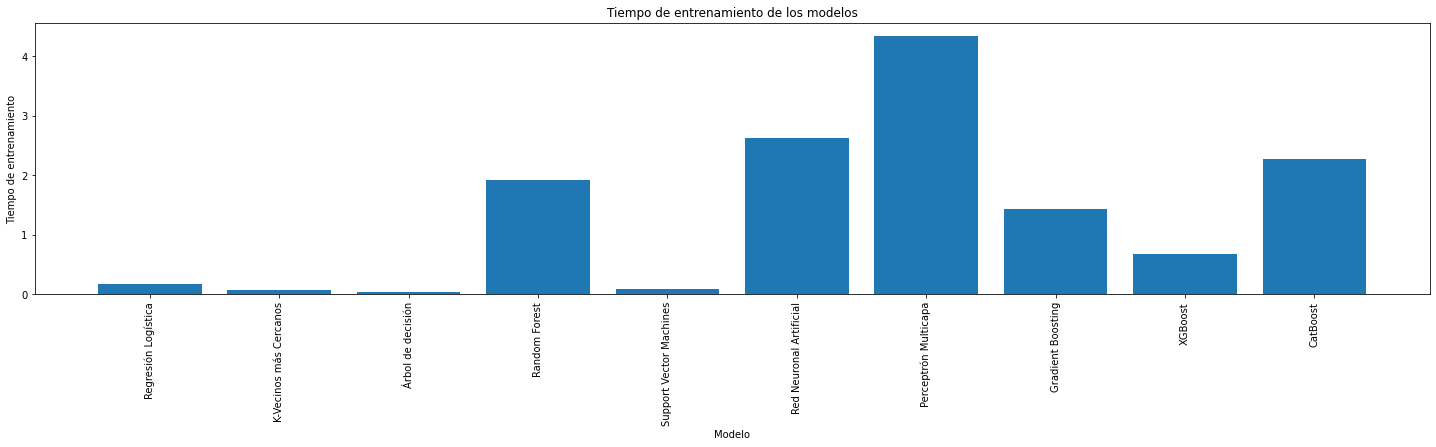

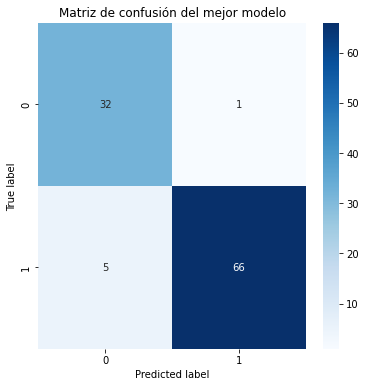

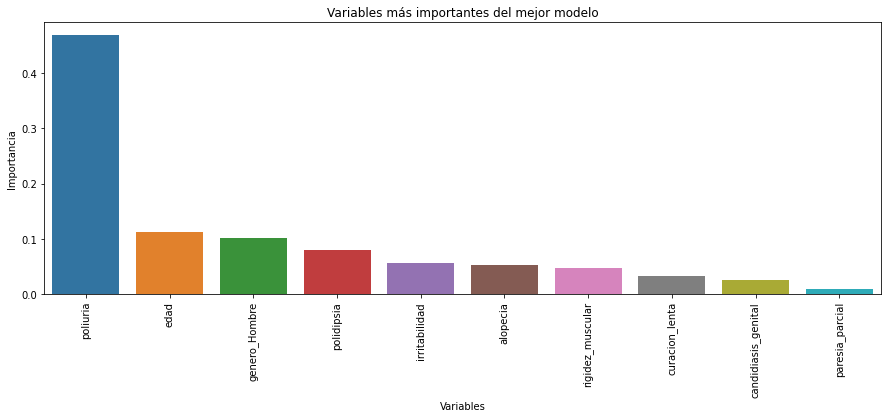

In [577]:
mejor_modelo = seleccionar_mejor_modelo(resultados)

In [570]:
import pickle
#Buscar el mejor modelo dentro del diccionario de resultados y exportarlo
def exportar_mejor_modelo(resultados, mejor_modelo):
    mejor_modelo = resultados[mejor_modelo]['modelo'].best_estimator_
    nombre_archivo = './model/mejor_modelo.pkl'
    
    # Exportar modelo en formato pickle
    with open(nombre_archivo, 'wb') as file:
        pickle.dump(mejor_modelo, file)
    
    print(f"El mejor modelo ha sido exportado como '{nombre_archivo}'")

In [571]:
#geramfernandez@gmail.com
exportar_mejor_modelo(resultados, mejor_modelo)

El mejor modelo ha sido exportado como './model/mejor_modelo.pkl'


In [484]:
df.head(1)

,edad,genero,poliuria,polidipsia,perdida_subita_de_peso,debilidad,polifagia,candidiasis_genital,vision_borrosa,picazon,irritabilidad,curacion_lenta,paresia_parcial,rigidez_muscular,alopecia,obesidad,clase
0,40,Hombre,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1


In [397]:
resultados[mejor_modelo]['modelo'].predict(df.head(1).drop('clase', axis=1))

array([1])